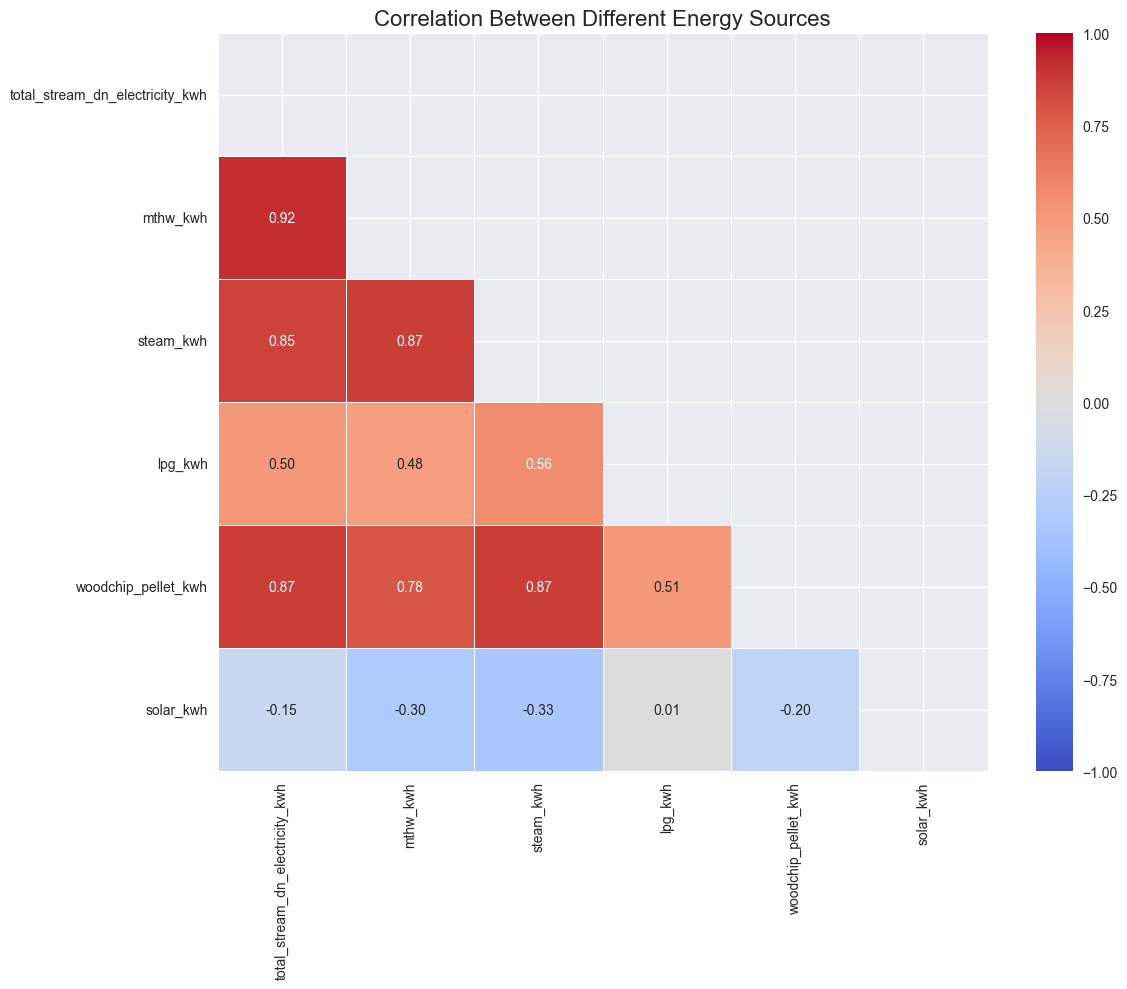

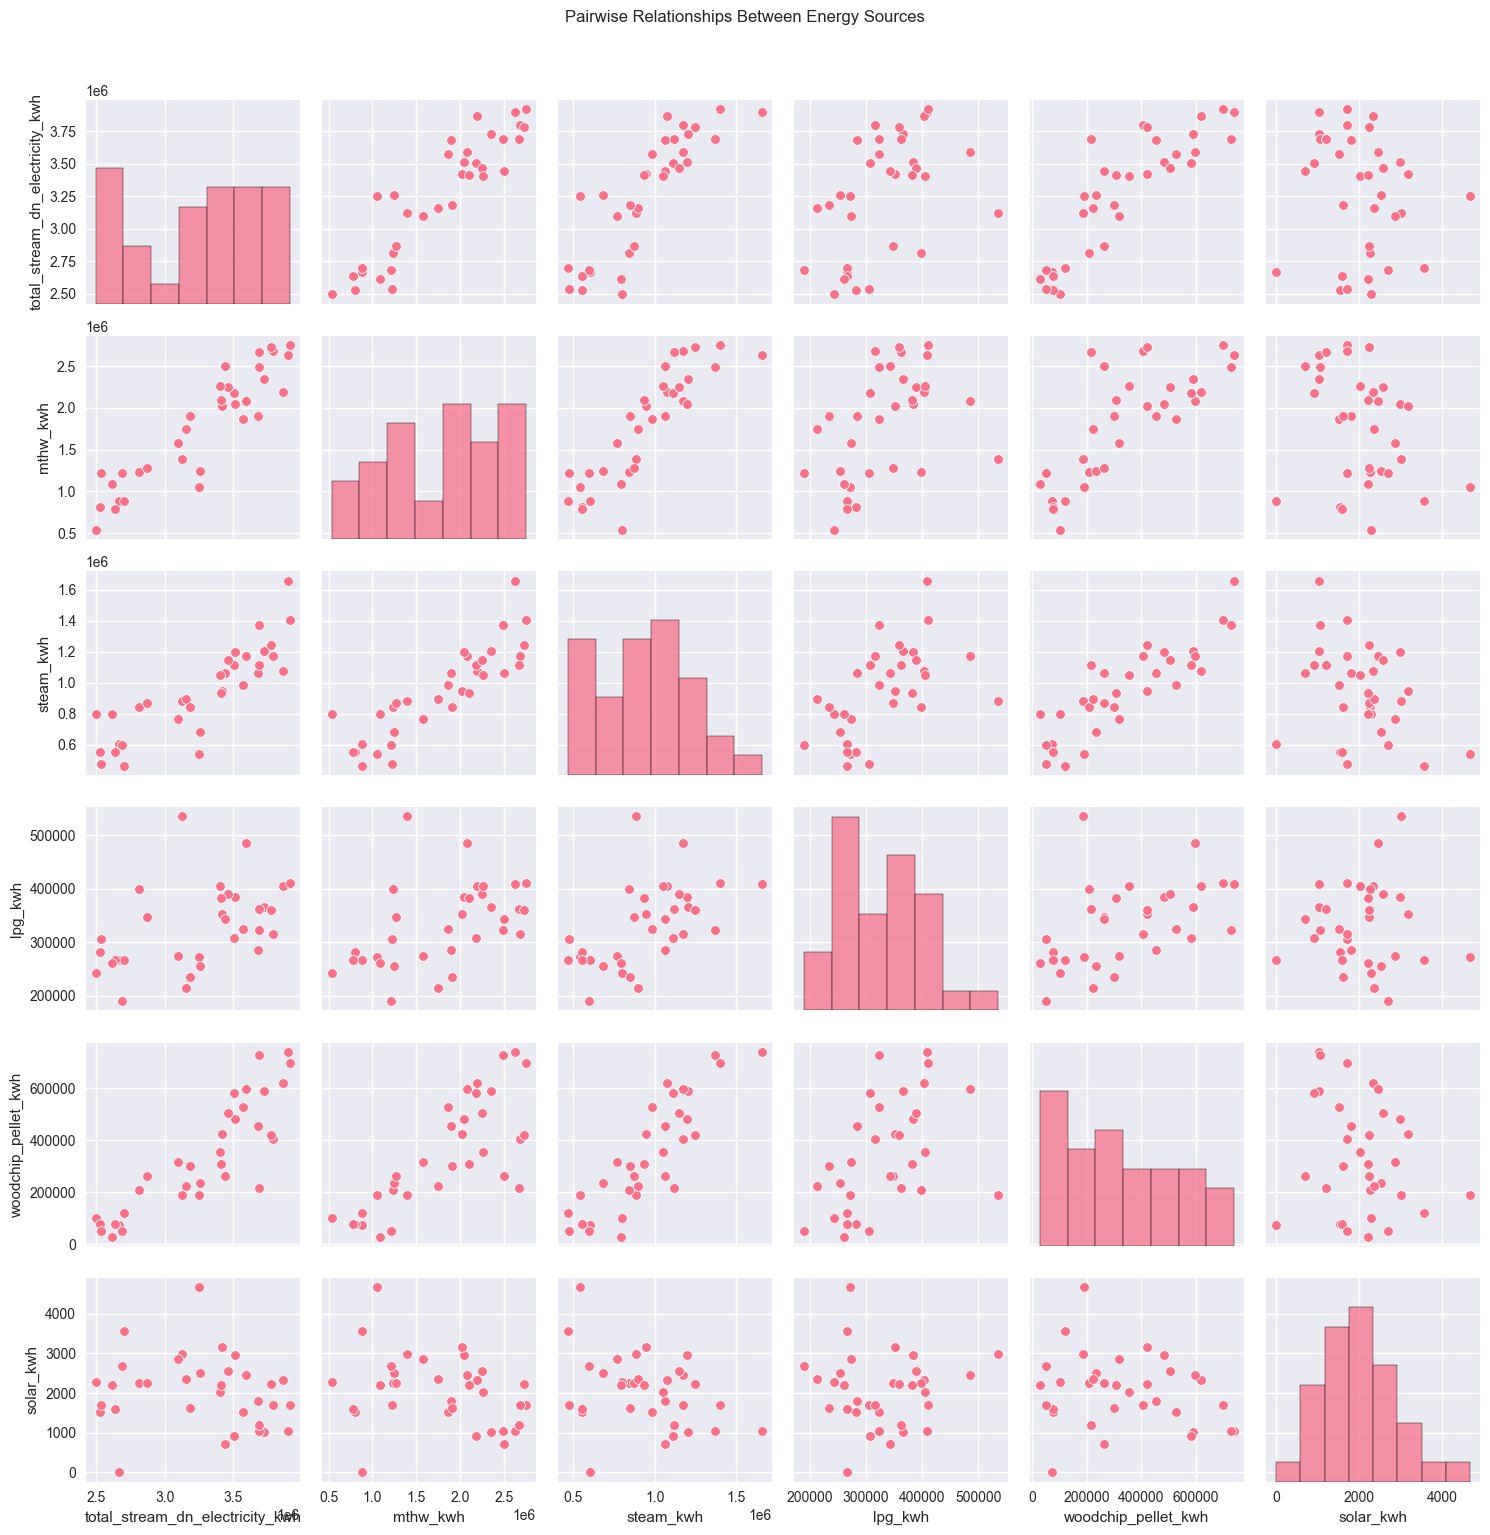

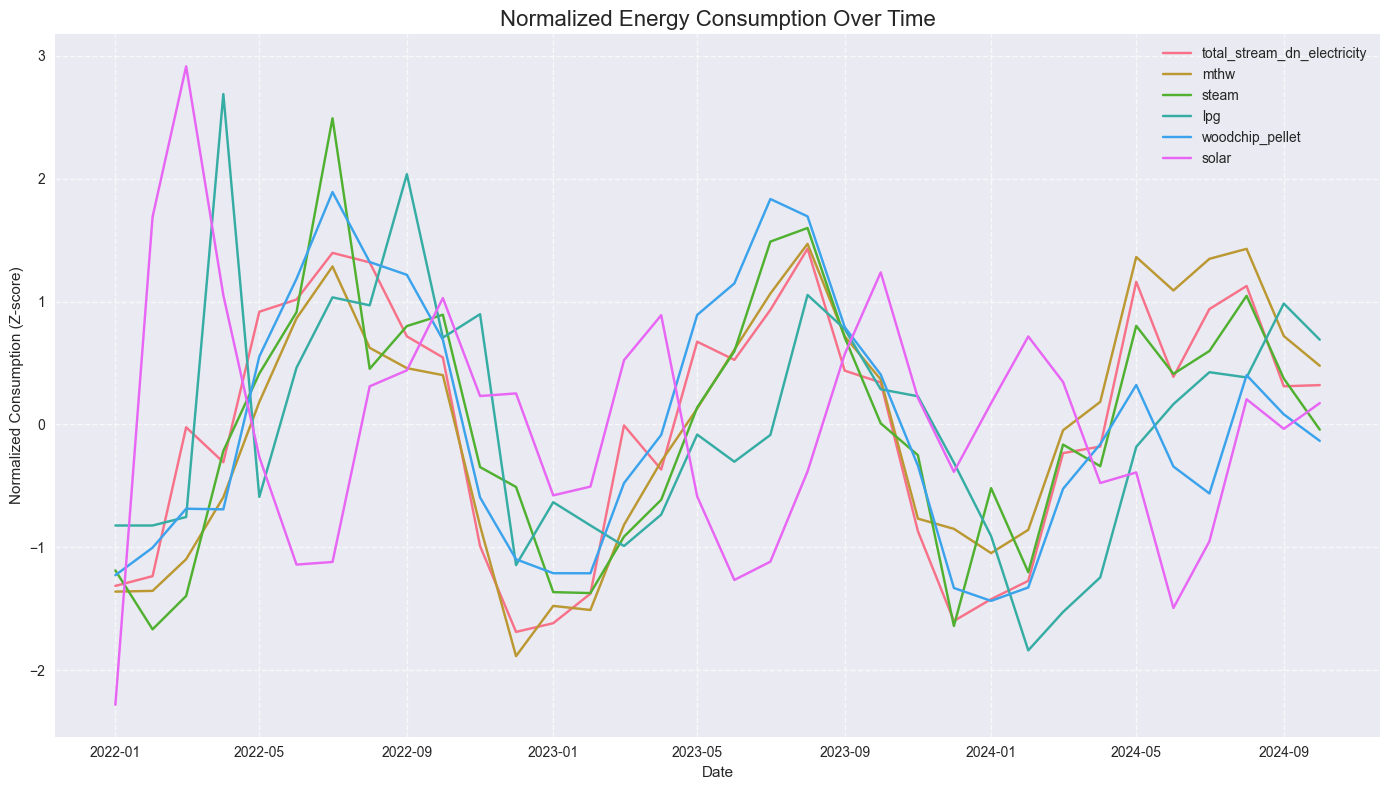

Strongest correlations between energy sources:
total_stream_dn_electricity and mthw: 0.915
mthw and total_stream_dn_electricity: 0.915
mthw and steam: 0.874
steam and mthw: 0.874
woodchip_pellet and steam: 0.872


In [2]:
# Import required libraries
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Read the data
BASE_DIR = Path(os.getcwd()).parents[2]  # Get root directory
FILE_PATH = BASE_DIR / "backend/data/Cleaned/Energy_Total.csv"
df = pd.read_csv(FILE_PATH)


# Convert month and year to datetime for better analysis
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'], format='%Y-%b')

# Select only the energy consumption columns
energy_columns = ['total_stream_dn_electricity_kwh', 'mthw_kwh', 'steam_kwh', 
                 'lpg_kwh', 'woodchip_pellet_kwh', 'solar_kwh']

# Calculate correlation matrix
correlation_matrix = df[energy_columns].corr()

# Create a heatmap visualization
plt.figure(figsize=(12, 10))
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, 
            annot=True,           # Show correlation values
            fmt='.2f',            # Format to 2 decimal places
            cmap='coolwarm',      # Color map (red for negative, blue for positive)
            mask=mask,            # Show only lower triangle
            linewidths=0.5,       # Add grid lines
            vmin=-1, vmax=1)      # Set scale from -1 to 1

plt.title('Correlation Between Different Energy Sources', fontsize=16)
plt.tight_layout()
plt.show()

# Create a pairplot to visualize relationships
sns.pairplot(df[energy_columns], height=2.5)
plt.suptitle('Pairwise Relationships Between Energy Sources', y=1.02)
plt.tight_layout()
plt.show()

# Create a line plot to visualize seasonal patterns
plt.figure(figsize=(14, 8))
for column in energy_columns:
    # Normalize data for better comparison (Z-score normalization)
    normalized_data = (df[column] - df[column].mean()) / df[column].std()
    plt.plot(df['date'], normalized_data, label=column.replace('_kwh', ''))

plt.title('Normalized Energy Consumption Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Normalized Consumption (Z-score)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate seasonal correlation (by month)
monthly_correlation = {}
for month in df['month'].unique():
    month_data = df[df['month'] == month]
    monthly_correlation[month] = month_data[energy_columns].corr()

# Print summary of strongest correlations
print("Strongest correlations between energy sources:")
flat_corr = correlation_matrix.unstack()
flat_corr = flat_corr[flat_corr < 1.0]  # Remove self-correlations
top_correlations = flat_corr.abs().sort_values(ascending=False).head(5)
for (source1, source2), corr_value in top_correlations.items():
    print(f"{source1.replace('_kwh', '')} and {source2.replace('_kwh', '')}: {corr_value:.3f}")
